<a href="https://colab.research.google.com/github/ParthDave111/financial-engineering-/blob/main/Feature_extraction_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature Extraction using Random forest regressor


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import yfinance as yf

In [3]:
# Define the ticker symbols for the Magnificent 7
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "TSLA", "META"]

# Download historical data from Yahoo Finance
data = yf.download(tickers, start="2010-01-01", end="2024-05-31")


[*********************100%%**********************]  7 of 7 completed


In [4]:
data

Price        Adj Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        MSFT   
Date                                                                     
2010-01-04    6.470741    6.695000   15.666453         NaN   23.431583   
2010-01-05    6.481929    6.734500   15.597464         NaN   23.439152   
2010-01-06    6.378825    6.612500   15.204272         NaN   23.295309   
2010-01-07    6.367032    6.500000   14.850323         NaN   23.053057   
2010-01-08    6.409363    6.676000   15.048295         NaN   23.212032   
...                ...         ...         ...         ...         ...   
2024-05-23  186.880005  181.050003  173.351044  465.317993  427.000000   
2024-05-24  189.979996  180.750000  174.789398  477.745667  430.160004   
2024-05-28  189.990005  182.149994  176.197769  479.444000  430.320007   
2024-05-29  190.289993  182.020004  175.698349  473.889465  429.170013   
2024-05-30  191.289993  179.320007  171.912704  466.586731  414.670013   

Price                                    Close                          ...  \
Ticker            NVDA        TSLA        AAPL        AMZN       GOOGL  ...   
Date                                                                    ...   
2010-01-04    0.423988         NaN    7.643214    6.695000   15.684434  ...   
2010-01-05    0.430179         NaN    7.656429    6.734500   15.615365  ...   
2010-01-06    0.432931         NaN    7.534643    6.612500   15.221722  ...   
2010-01-07    0.424447         NaN    7.520714    6.500000   14.867367  ...   
2010-01-08    0.425364         NaN    7.570714    6.676000   15.065566  ...   
...                ...         ...         ...         ...         ...  ...   
2024-05-23  103.790482  173.740005  186.880005  181.050003  173.550003  ...   
2024-05-24  106.460258  179.240005  189.979996  180.750000  174.990005  ...   
2024-05-28  113.891647  176.750000  189.990005  182.149994  176.399994  ...   
2024-05-29  114.815567  176.190002  190.289993  182.020004  175.899994  ...   
2024-05-30  110.490921  178.789993  191.289993  179.320007  172.110001  ...   

Price             Open                             Volume             \
Ticker            MSFT        NVDA        TSLA       AAPL       AMZN   
Date                                                                   
2010-01-04   30.620001    0.462750         NaN  493729600  151998000   
2010-01-05   30.850000    0.460500         NaN  601904800  177038000   
2010-01-06   30.879999    0.468750         NaN  552160000  143576000   
2010-01-07   30.629999    0.469500         NaN  477131200  220604000   
2010-01-08   30.280001    0.459000         NaN  447610800  196610000   
...                ...         ...         ...        ...        ...   
2024-05-23  432.970001  102.028000  181.800003   51005900   33670200   
2024-05-24  427.190002  104.448997  174.839996   36294600   27434100   
2024-05-28  429.630005  110.244003  176.399994   52280100   29927000   
2024-05-29  425.690002  113.050003  174.190002   53068000   32009300   
2024-05-30  424.299988  114.650002  178.580002   49947900   29249200   

Price                                                               
Ticker          GOOGL        META      MSFT       NVDA        TSLA  
Date                                                                
2010-01-04   78169752         NaN  38409100  800204000         NaN  
2010-01-05  120067812         NaN  49749600  728648000         NaN  
2010-01-06  158988852         NaN  58182400  649168000         NaN  
2010-01-07  256315428         NaN  50559700  547792000         NaN  
2010-01-08  188783028         NaN  51197400  478168000         NaN  
...               ...         ...       ...        ...         ...  
2024-05-23   21024900  11747900.0  17211700  835065000  71975500.0  
2024-05-24   16572500  12012300.0  11845800  429494000  65479700.0  
2024-05-28   20572200  10175800.0  15718000  652728000  59736600.0  
2024-05-29   233887

In [5]:
# Select the adjusted close prices
adj_close = data['Adj Close']

# Handle missing values
adj_close = adj_close.fillna(method='ffill')

# Ensure there are no remaining NaNs
adj_close = adj_close.dropna()

Feature Extraction

In [6]:
def extract_features(df, target_stock, window_size=5):
    X = []
    y = df[target_stock].shift(-1).dropna()  # Target variable: next day's closing price of target stock

    for i in range(len(df) - window_size):
        X.append(df.iloc[i:i+window_size].values.flatten())

    X = np.array(X)
    return X, y

In [9]:
# Ensure 'AAPL' is a column in your DataFrame
if 'AAPL' not in data.columns:
    # If 'AAPL' is not a column, you might need to load or process the data to include it
    print("Error: 'AAPL' column not found in the DataFrame. Please check your data.")
else:
    # Extract features and target variable
    target_stock = 'AAPL'  # Example: predicting AAPL's closing price
    X, y = extract_features(data, target_stock)

Error: 'AAPL' column not found in the DataFrame. Please check your data.


In [10]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(adj_close)

# Convert the scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, index=adj_close.index, columns=adj_close.columns)

In [11]:
scaled_data

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2012-05-18,-0.935380,-1.207678,-1.233028,-1.232393,-1.001654,-0.623900,-0.792689
2012-05-21,-0.919599,-1.203854,-1.224628,-1.272249,-0.998266,-0.623623,-0.791923
2012-05-22,-0.921800,-1.206349,-1.232783,-1.301003,-0.998195,-0.623821,-0.790637
2012-05-23,-0.914860,-1.204599,-1.227477,-1.291513,-1.002783,-0.623426,-0.790497
2012-05-24,-0.917536,-1.206430,-1.231031,-1.281739,-1.003066,-0.623861,-0.790966
...,...,...,...,...,...,...,...
2024-05-23,1.950300,1.850581,2.648408,2.829597,2.541380,5.325366,0.840990
2024-05-24,2.002661,1.845195,2.683666,2.947774,2.569129,5.478807,0.893260
2024-05-28,2.002830,1.870328,2.718189,2.963924,2.570534,5.905914,0.869596


In [13]:
# Extract features and target variable
target_stock = 'AAPL'  # Example: predicting AAPL's closing price
X, y = extract_features(scaled_data, target_stock)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
def extract_features(scaled_data, target_stock):
    # Assuming 'Date' is the index of your DataFrame
    features = scaled_data.drop(target_stock, axis=1)  # Features are all columns except the target stock
    target = scaled_data[target_stock]  # Target is the closing price of the target stock

    # Ensure features and target are aligned by date (index)
    features, target = features.align(target, join='inner', axis=0)

    return features, target

# Extract features and target variable
target_stock = 'AAPL'  # Example: predicting AAPL's closing price
X, y = extract_features(scaled_data, target_stock)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
# Predict on the test set
y_pred = model.predict(X_test)

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0013777986115205431


In [21]:
# Feature Importance
feature_importances = model.feature_importances_
print("\nFeature Importances:")
for i, feature_importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {feature_importance}")


Feature Importances:
Feature 1: 0.0070674991276982145
Feature 2: 0.03133991087165725
Feature 3: 0.006678657467705903
Feature 4: 0.03031033231606096
Feature 5: 0.7704874847656792
Feature 6: 0.1541161154511986


From the above analysis, features 1,2,3 and 4 have very low value and can be removed from further analysis

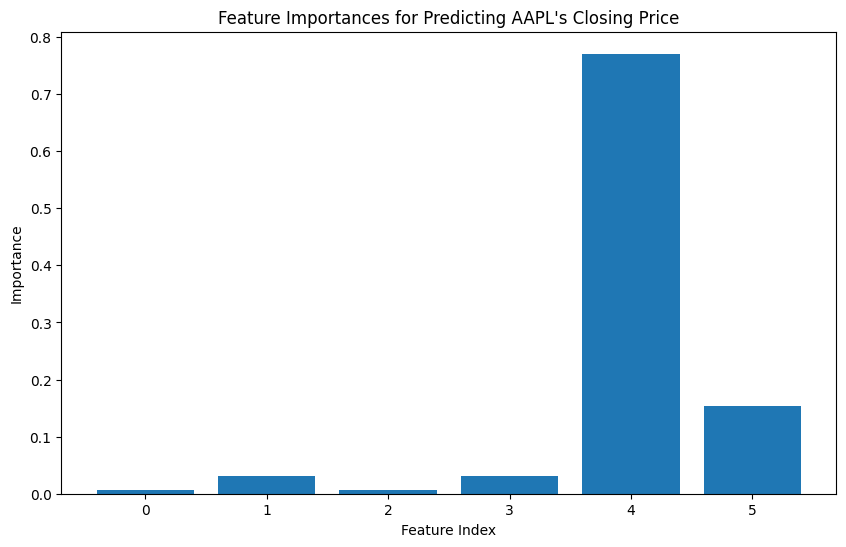

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances for Predicting AAPL's Closing Price")
plt.show()